<a href="https://colab.research.google.com/github/princesapkota/assignment1/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/MyDrive/datasets/WHR-2024-5CS037.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
1. Data Exploration and Understanding:

• Dataset Overview:


In [10]:
#Load the dataset and display the first 10 rows.
data = pd.read_csv('/content/drive/MyDrive/datasets/WHR-2024-5CS037.csv')
print (data.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

In [12]:
#Identify the number of rows and columns in the dataset.
rows, columns = data.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 143, Columns: 9


In [11]:
#List all the columns and their data types.
print(data.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:

In [13]:
# Calculate the mean, median, and standard deviation for the 'score' column
mean_score = data['score'].mean()
median_score = data['score'].median()
std_dev_score = data['score'].std()

print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Standard Deviation: {std_dev_score}")

Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995


In [14]:
#Identify the country with the highest and lowest happiness scores.
highest_happiness = data.loc[data['score'].idxmax()]
lowest_happiness = data.loc[data['score'].idxmin()]

print("Country with the highest happiness score:")
print(highest_happiness[['Country name', 'score']])
print("\nCountry with the lowest happiness score:")
print(lowest_happiness[['Country name', 'score']])


Country with the highest happiness score:
Country name    Finland
score             7.741
Name: 0, dtype: object

Country with the lowest happiness score:
Country name    Afghanistan
score                 1.721
Name: 142, dtype: object


• Missing Values:

In [15]:
#Check if there are any missing values in the dataset. If so, display the total count for each column.
# Check for missing values in the dataset
missing_values = data.isnull().sum()

print("Missing values in the dataset:")
print(missing_values[missing_values > 0])

Missing values in the dataset:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:

In [16]:
#Filter the dataset to show only the countries with a Score greater than 7.5.
high_score_countries = data[data['score'] > 7.5]

# Display the filtered dataset
print(high_score_countries[['Country name', 'score']])


  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


In [17]:
# Filter the dataset for countries with a Score greater than 7.5
high_score_countries = data[data['score'] > 7.5]

# Sort the filtered dataset by 'Log GDP per capita' in descending order
sorted_countries = high_score_countries.sort_values(by='Log GDP per capita', ascending=False)

# Display the top 10 rows
top_10_countries = sorted_countries.head(10)
print(top_10_countries[['Country name', 'score', 'Log GDP per capita']])


  Country name  score  Log GDP per capita
1      Denmark  7.583               1.908
2      Iceland  7.525               1.881
0      Finland  7.741               1.844


• Adding New Columns:

In [18]:
#1. Create a new column called Happiness Category that categorizes countries into three categoriesbased on their Score:
#Low − (Score < 4)
#Medium − (4 ≤ Score ≤ 6)
#High − (Score > 6)
data['Happiness Category'] = pd.cut(
    data['score'],
    bins=[-float('inf'), 4, 6, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# Display the first few rows to verify the new column
print(data[['Country name', 'score', 'Happiness Category']].head())


  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


2. Data Visualizations:

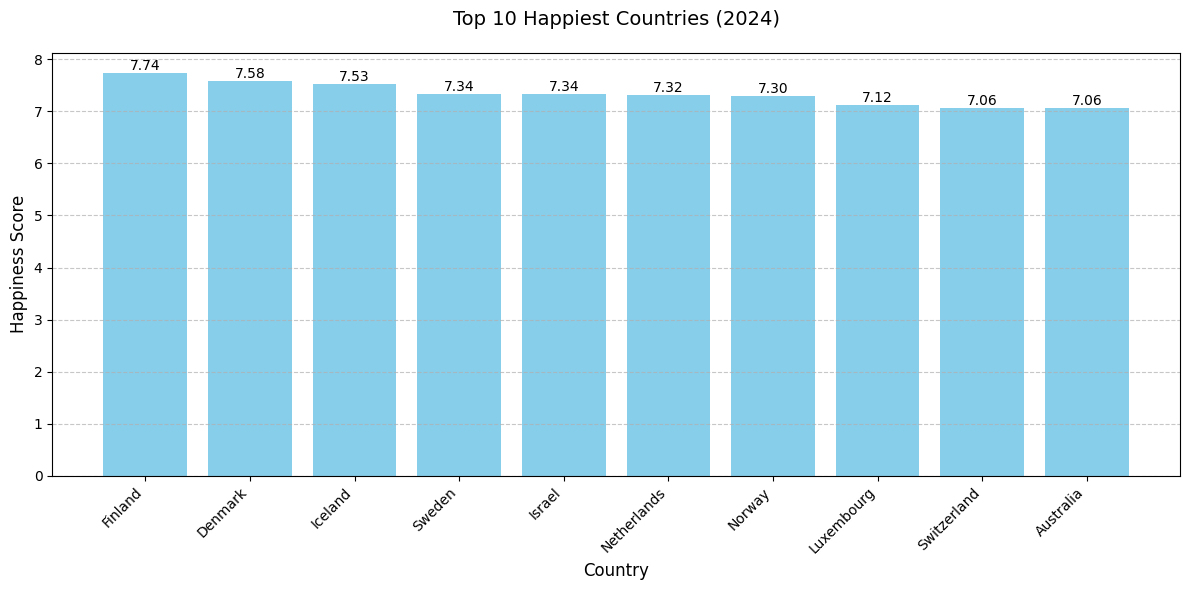

In [19]:
#Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
top_10 = data.nlargest(10, 'score')

# Create figure and axis with larger size
plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(range(len(top_10)), top_10['score'], color='skyblue')

# Customize the plot
plt.title('Top 10 Happiest Countries (2024)', fontsize=14, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Set x-axis labels with country names
plt.xticks(range(len(top_10)), top_10['Country name'], rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

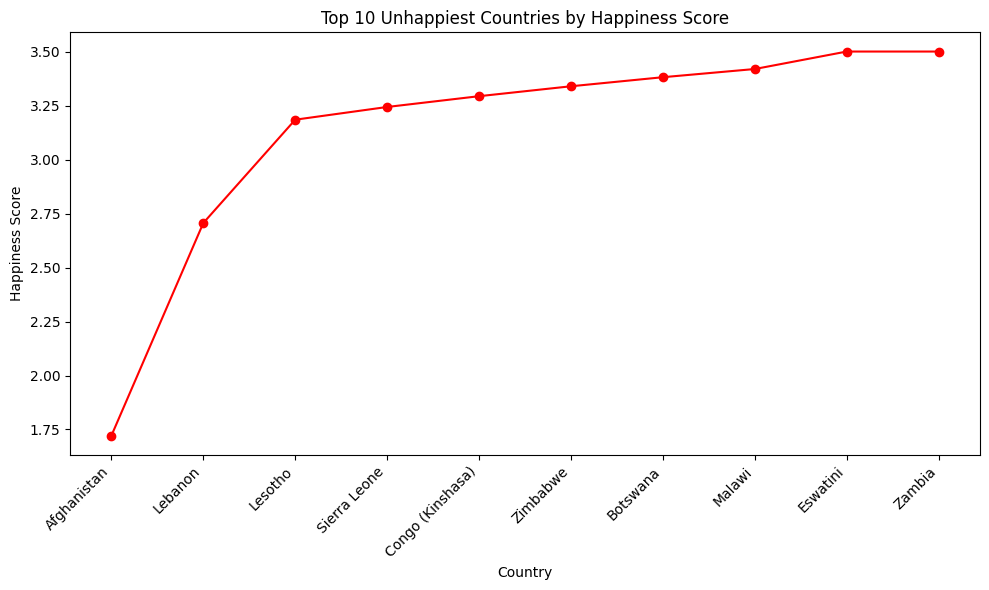

In [21]:
import matplotlib.pyplot as plt

# Sort the data by 'score' in ascending order and select the top 10 unhappiest countries
top_10_unhappiest = data.sort_values(by='score', ascending=True).head(10)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-', color='red')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries by Happiness Score')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


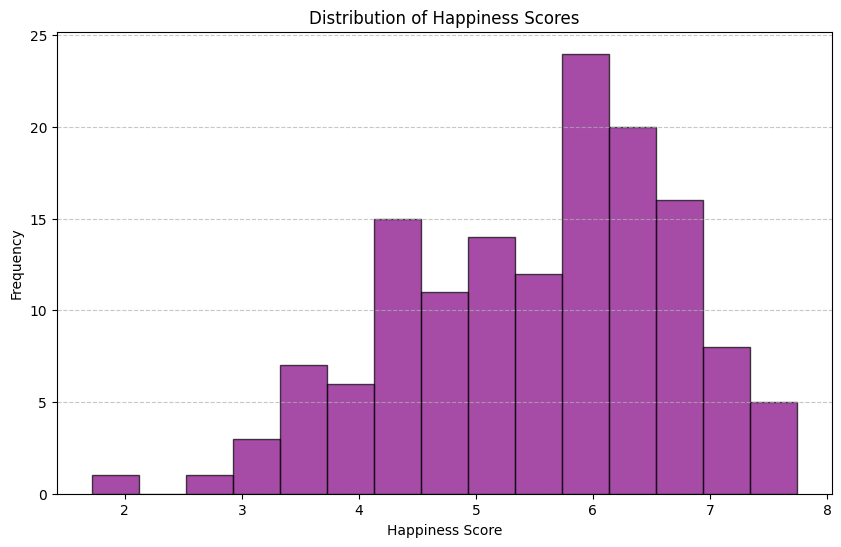

In [22]:
#Plot a histogram for the Score column to show its distribution and also interpret.

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['score'], bins=15, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


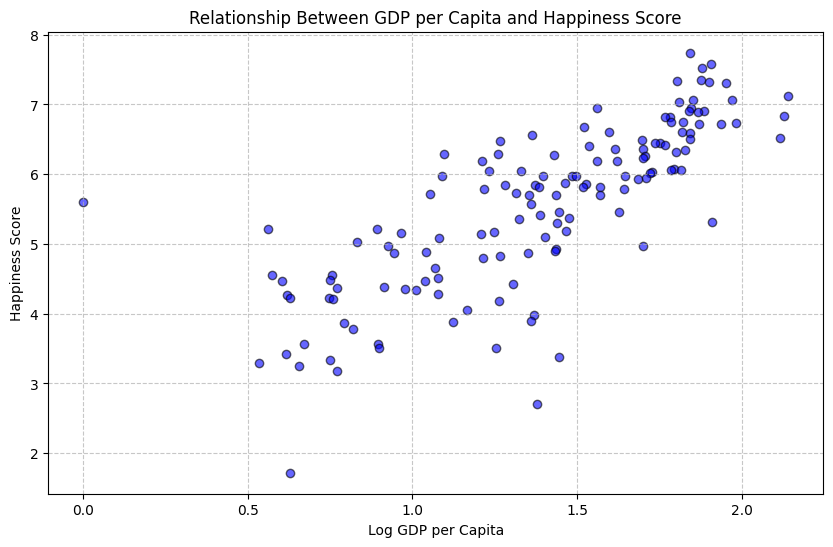

In [23]:
#Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
plt.figure(figsize=(10, 6))
plt.scatter(data['Log GDP per capita'], data['score'], color='blue', alpha=0.6, edgecolor='black')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Relationship Between GDP per Capita and Happiness Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Problem - 2 - Some Advance Data Exploration Task:  
Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [26]:

# List of South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter the dataset for South Asian countries
south_asia_df = data[data['Country name'].isin(south_asian_countries)]

# Save the filtered DataFrame to a CSV file
south_asia_df.to_csv('/content/drive/MyDrive/datasets/south_asia_happiness.csv', index=False)


Task - 2 - Composite Score Ranking:

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

Rank the South Asian countries based on the Composite score in descending order.

Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-32-b06eb44d9a0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (


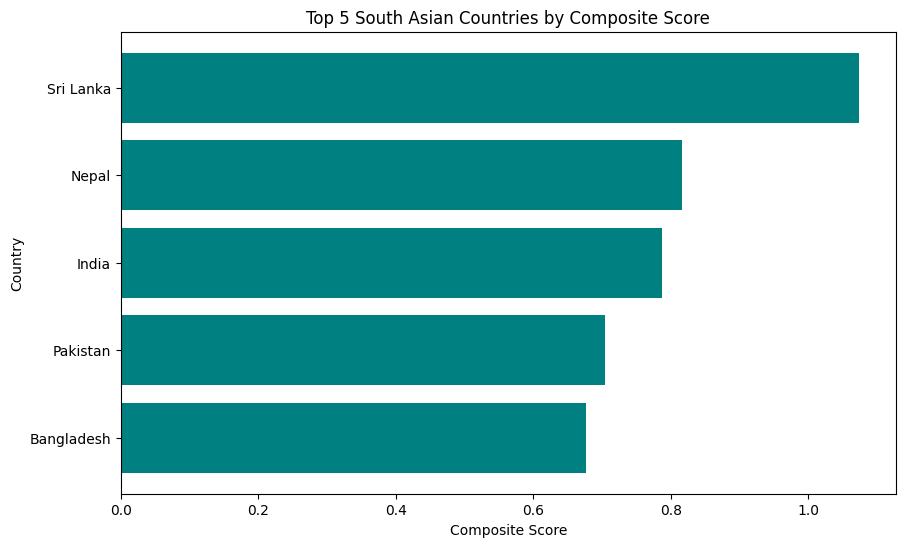

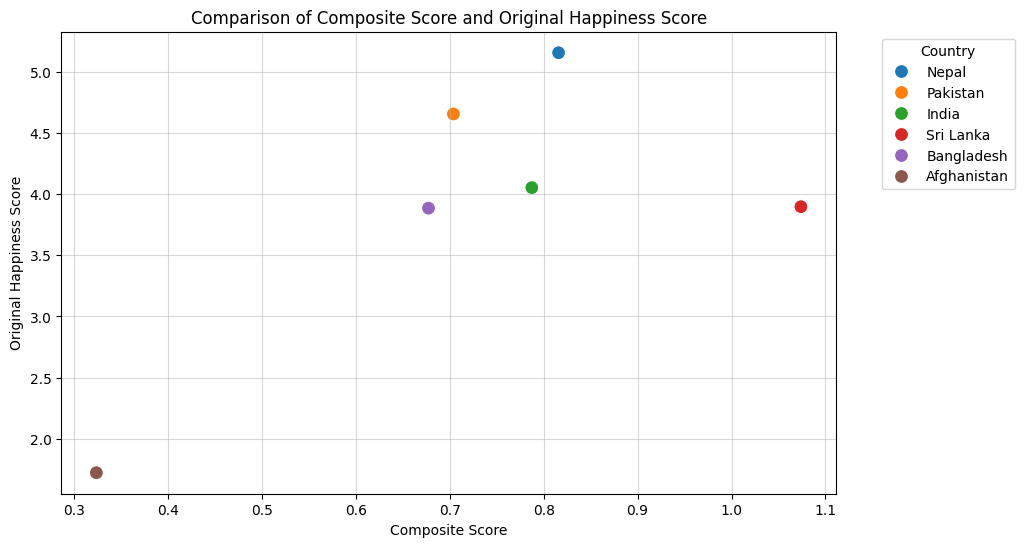

Correlation between Composite Score and Original Happiness Score: 0.68


In [32]:
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)
south_asia_df[['Country name', 'Composite Score']]


south_asia_ranked = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Display the ranked DataFrame
print(south_asia_ranked[['Country name', 'Composite Score']])

#top 5 composite score
top_5_composite = south_asia_df.sort_values(by='Composite Score', ascending=False).head(5)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_composite['Country name'], top_5_composite['Composite Score'], color='teal')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score on top
plt.show()

#visualization scatter plot for comparision
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=south_asia_df, hue='Country name', s=100)
plt.xlabel('Composite Score')
plt.ylabel('Original Happiness Score')
plt.title('Comparison of Composite Score and Original Happiness Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.show()

# Calculate correlation between Composite Score and Original Score
correlation = south_asia_df['Composite Score'].corr(south_asia_df['score'])
print(f"Correlation between Composite Score and Original Happiness Score: {correlation:.2f}")


Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

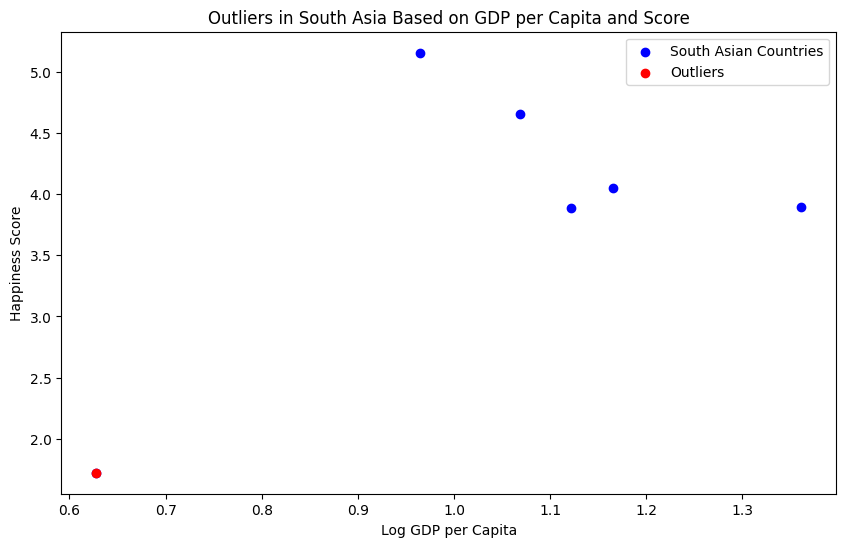

In [33]:
# Define outliers using 1.5 * IQR rule
q1 = south_asia_df['Log GDP per capita'].quantile(0.25)
q3 = south_asia_df['Log GDP per capita'].quantile(0.75)
iqr = q3 - q1

gdp_lower_bound = q1 - 1.5 * iqr
gdp_upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = south_asia_df[(south_asia_df['Log GDP per capita'] < gdp_lower_bound) |
                         (south_asia_df['Log GDP per capita'] > gdp_upper_bound)]

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='South Asian Countries', color='blue')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], label='Outliers', color='red')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Outliers in South Asia Based on GDP per Capita and Score')
plt.legend()
plt.show()


Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Correlation with Score:
Freedom to Make Life Choices: 0.8005185224163315
Generosity: 0.874512371253192


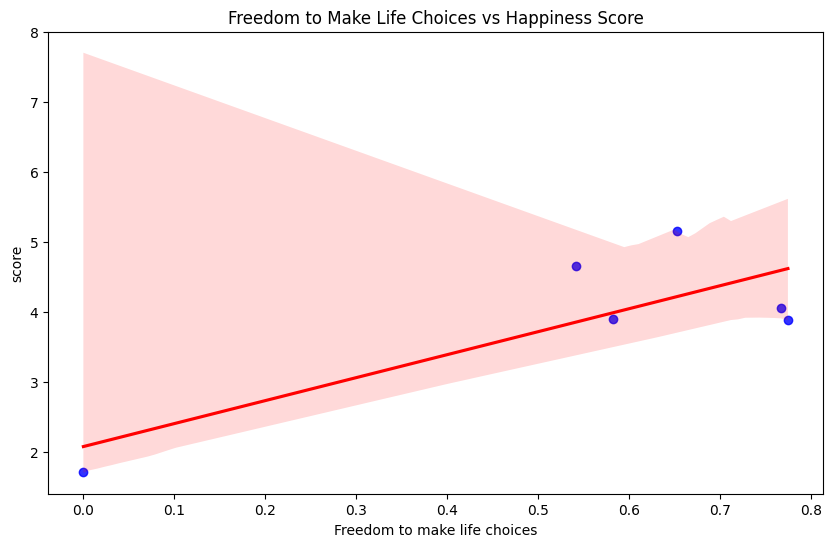

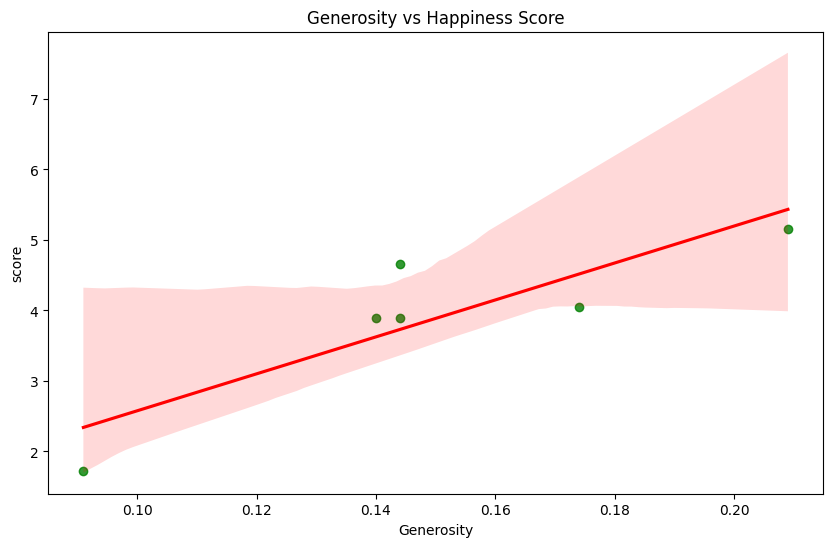

In [34]:


# Calculate Pearson correlation
freedom_corr = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'], method='pearson')
generosity_corr = south_asia_df['Generosity'].corr(south_asia_df['score'], method='pearson')

print(f"Correlation with Score:")
print(f"Freedom to Make Life Choices: {freedom_corr}")
print(f"Generosity: {generosity_corr}")

# Scatter plot with trendlines
import seaborn as sns

# Freedom to Make Life Choices vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.show()

# Generosity vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asia_df, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Generosity vs Happiness Score')
plt.show()


Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

<ipython-input-35-9732b188a4e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


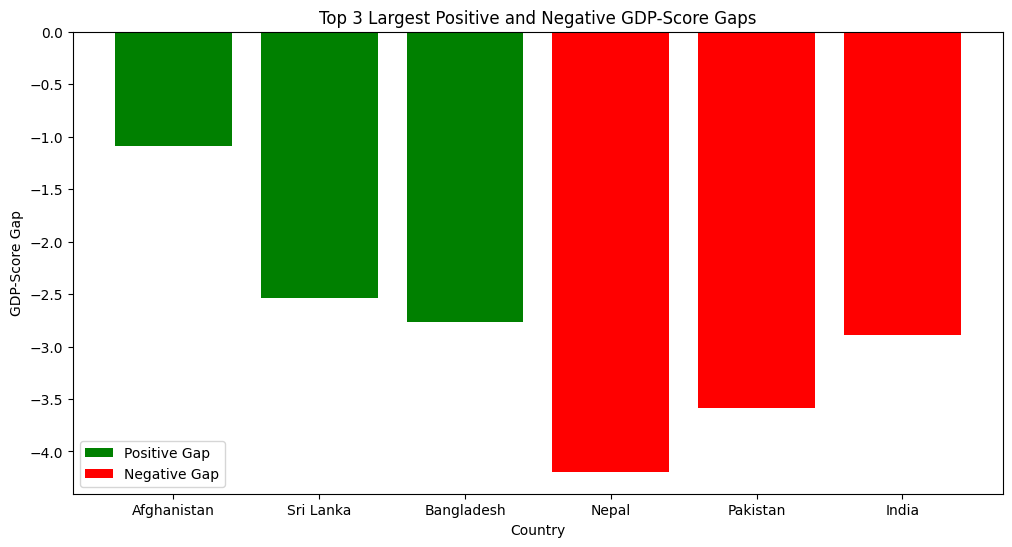

In [35]:
# Add GDP-Score Gap column
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Rank by GDP-Score Gap
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap')
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

# Highlight top 3 largest positive and negative gaps
top_positive_gap = descending_gap.head(3)
top_negative_gap = ascending_gap.head(3)

# Bar chart for largest positive and negative gaps
plt.figure(figsize=(12, 6))

# Positive gaps
plt.bar(top_positive_gap['Country name'], top_positive_gap['GDP-Score Gap'], color='green', label='Positive Gap')

# Negative gaps
plt.bar(top_negative_gap['Country name'], top_negative_gap['GDP-Score Gap'], color='red', label='Negative Gap')

plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Largest Positive and Negative GDP-Score Gaps')
plt.legend()
plt.show()


Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]



In [36]:
# List of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset for Middle Eastern countries
middle_east_df = data[data['Country name'].isin(middle_east_countries)]

# Save the filtered DataFrame for future use
middle_east_df.to_csv('/content/drive/MyDrive/datasets/middle_east_happiness.csv', index=False)


Complete the following task:
1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [37]:
# Calculate descriptive statistics for South Asia
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

# Calculate descriptive statistics for Middle East
middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

# Print the results
print(f"South Asia: Mean = {south_asia_mean:.2f}, Standard Deviation = {south_asia_std:.2f}")
print(f"Middle East: Mean = {middle_east_mean:.2f}, Standard Deviation = {middle_east_std:.2f}")

# Determine which region has higher happiness scores on average
if south_asia_mean > middle_east_mean:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")


South Asia: Mean = 3.90, Standard Deviation = 1.18
Middle East: Mean = 5.41, Standard Deviation = 1.57
Middle East has higher happiness scores on average.


2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

In [39]:
# Top 3 and Bottom 3 for South Asia
south_asia_top3 = south_asia_df.nlargest(3, 'score')
south_asia_bottom3 = south_asia_df.nsmallest(3, 'score')

# Top 3 and Bottom 3 for Middle East
middle_east_top3 = middle_east_df.nlargest(3, 'score')
middle_east_bottom3 = middle_east_df.nsmallest(3, 'score')


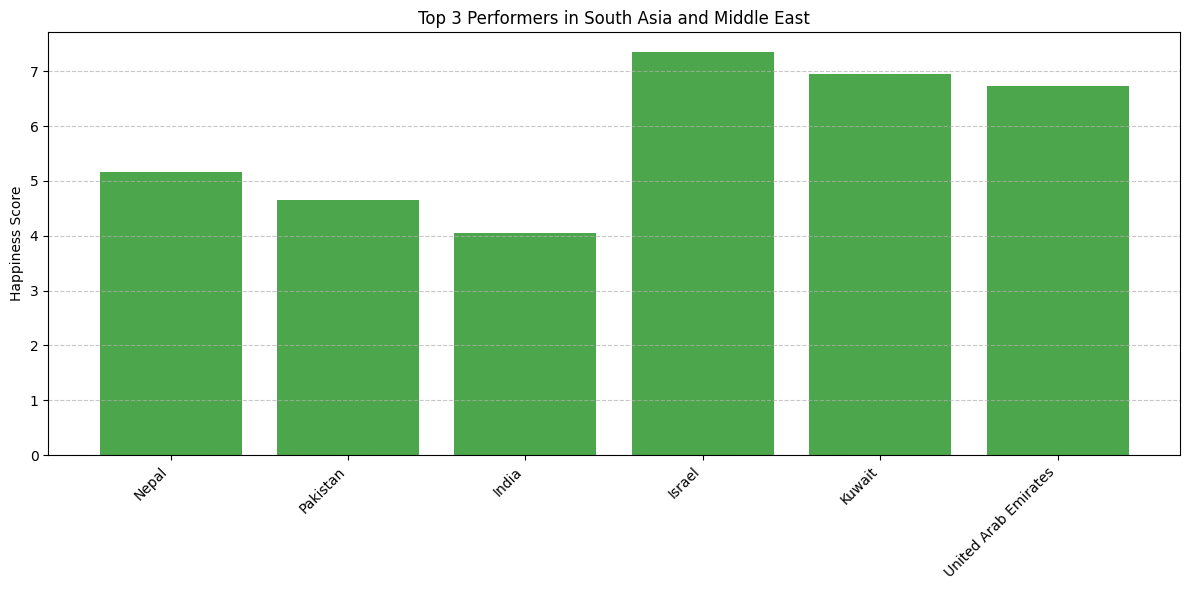

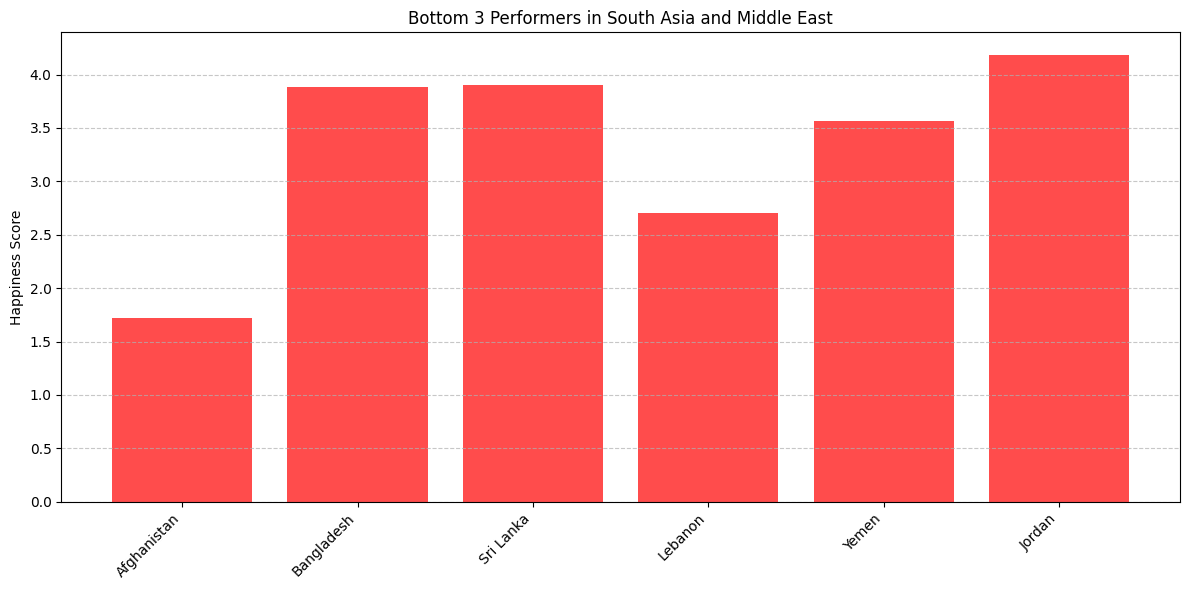

In [40]:
import matplotlib.pyplot as plt

# Combine top and bottom performers into separate DataFrames
top_performers = pd.concat([south_asia_top3, middle_east_top3])
bottom_performers = pd.concat([south_asia_bottom3, middle_east_bottom3])

# Plot Top Performers
plt.figure(figsize=(12, 6))
plt.bar(top_performers['Country name'], top_performers['score'], color='green', alpha=0.7)
plt.title('Top 3 Performers in South Asia and Middle East')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Bottom Performers
plt.figure(figsize=(12, 6))
plt.bar(bottom_performers['Country name'], bottom_performers['score'], color='red', alpha=0.7)
plt.title('Bottom 3 Performers in South Asia and Middle East')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

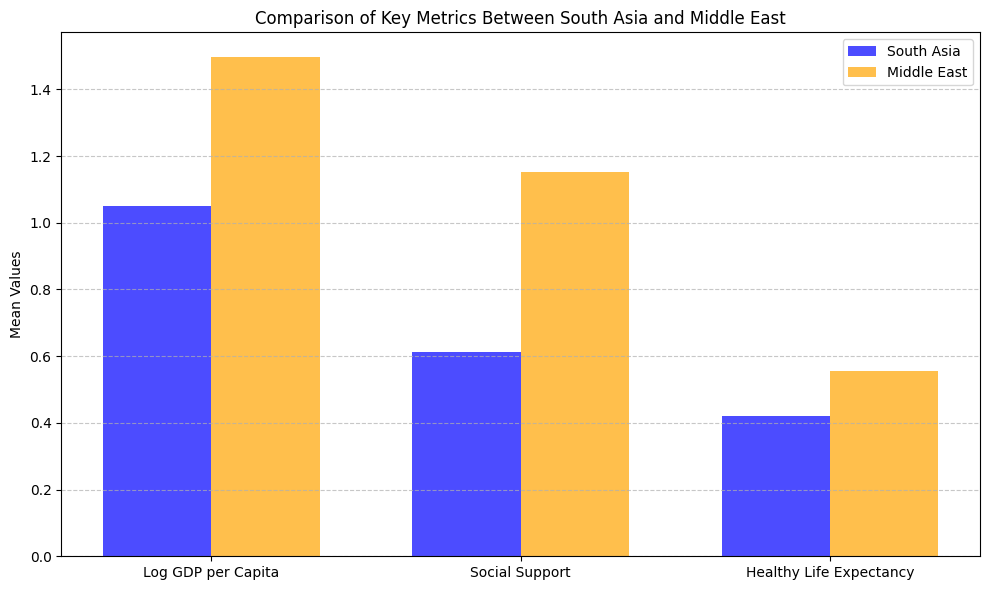


The largest disparity is in 'Social Support' with a difference of 0.54.


In [43]:
# Calculate mean values for key metrics in South Asia
south_asia_means = {
    'Log GDP per Capita': south_asia_df['Log GDP per capita'].mean(),
    'Social Support': south_asia_df['Social support'].mean(),
    'Healthy Life Expectancy': south_asia_df['Healthy life expectancy'].mean()
}

# Calculate mean values for key metrics in Middle East
middle_east_means = {
    'Log GDP per Capita': middle_east_df['Log GDP per capita'].mean(),
    'Social Support': middle_east_df['Social support'].mean(),
    'Healthy Life Expectancy': middle_east_df['Healthy life expectancy'].mean()
}

# Combine data into a DataFrame for visualization
metrics_df = pd.DataFrame({
    'Metric': ['Log GDP per Capita', 'Social Support', 'Healthy Life Expectancy'],
    'South Asia': [south_asia_means['Log GDP per Capita'],
                   south_asia_means['Social Support'],
                   south_asia_means['Healthy Life Expectancy']],
    'Middle East': [middle_east_means['Log GDP per Capita'],
                    middle_east_means['Social Support'],
                    middle_east_means['Healthy Life Expectancy']]
})


# Create grouped bar chart
x = np.arange(len(metrics_df['Metric']))  # Label locations
width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, metrics_df['South Asia'], width, label='South Asia', color='blue', alpha=0.7)
plt.bar(x + width/2, metrics_df['Middle East'], width, label='Middle East', color='orange', alpha=0.7)

# Add labels, title, and legend
plt.xticks(x, metrics_df['Metric'])
plt.ylabel('Mean Values')
plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Calculate absolute differences between the metrics
metrics_df['Disparity'] = abs(metrics_df['South Asia'] - metrics_df['Middle East'])

# Identify the metric with the largest disparity
largest_disparity_metric = metrics_df.loc[metrics_df['Disparity'].idxmax()]
print(f"\nThe largest disparity is in '{largest_disparity_metric['Metric']}' with a difference of {largest_disparity_metric['Disparity']:.2f}.")


4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [ ]:
# Compute range and CV for South Asia
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()

# Compute range and CV for Middle East
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia: Range = {south_asia_range:.2f}, Coefficient of Variation (CV) = {south_asia_cv:.2f}")
print(f"Middle East: Range = {middle_east_range:.2f}, Coefficient of Variation (CV) = {middle_east_cv:.2f}")

# Determine which region has greater variability
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
else:
    print("Middle East has greater variability in happiness scores.")


5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

South Asia Correlations:
 - Freedom to Make Life Choices: 0.80
 - Generosity: 0.87

Middle East Correlations:
 - Freedom to Make Life Choices: 0.86
 - Generosity: 0.63


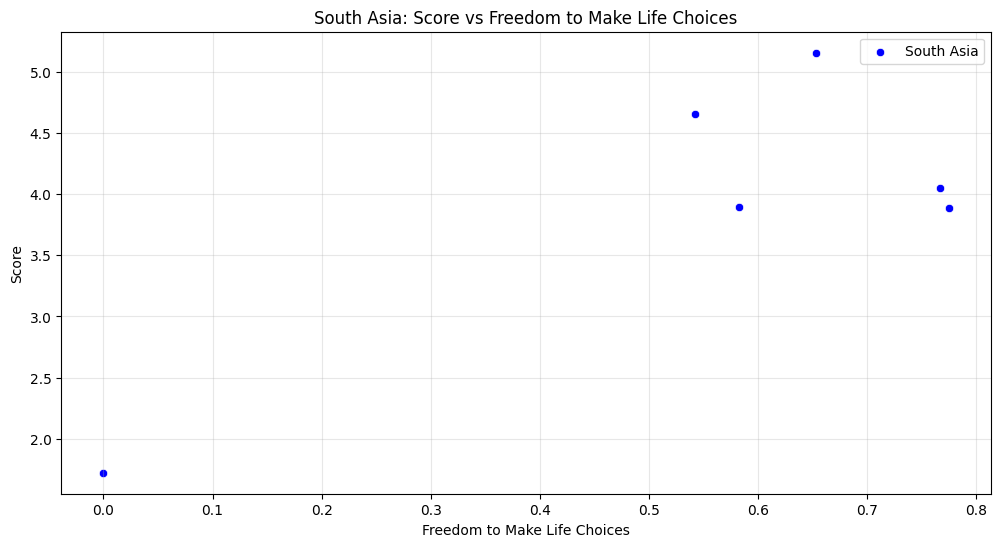

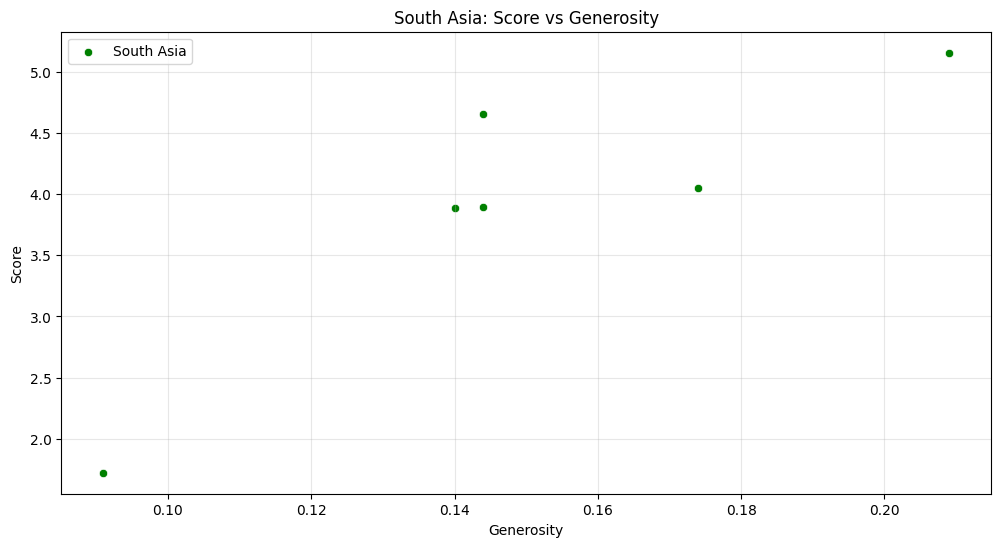

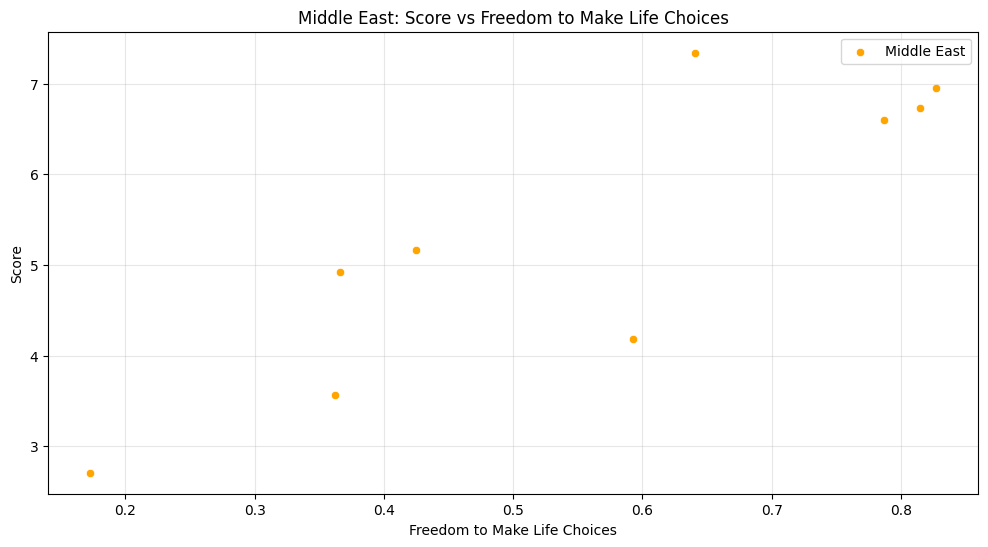

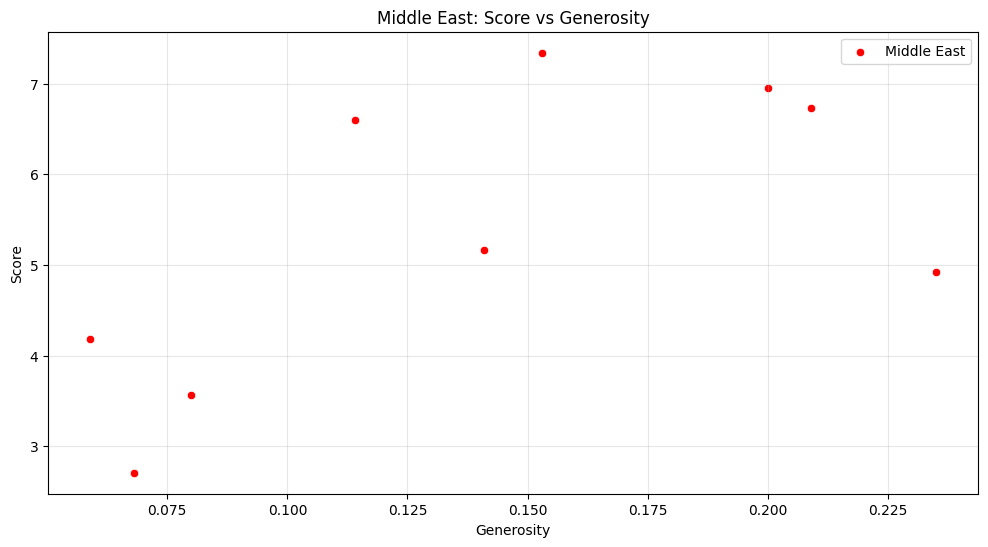

In [44]:
# Correlation for South Asia
south_asia_corr_freedom = south_asia_df['score'].corr(south_asia_df['Freedom to make life choices'])
south_asia_corr_generosity = south_asia_df['score'].corr(south_asia_df['Generosity'])

# Correlation for Middle East
middle_east_corr_freedom = middle_east_df['score'].corr(middle_east_df['Freedom to make life choices'])
middle_east_corr_generosity = middle_east_df['score'].corr(middle_east_df['Generosity'])

print("South Asia Correlations:")
print(f" - Freedom to Make Life Choices: {south_asia_corr_freedom:.2f}")
print(f" - Generosity: {south_asia_corr_generosity:.2f}")

print("\nMiddle East Correlations:")
print(f" - Freedom to Make Life Choices: {middle_east_corr_freedom:.2f}")
print(f" - Generosity: {middle_east_corr_generosity:.2f}")

import seaborn as sns

# Scatter plot for South Asia: Score vs Freedom to Make Life Choices
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia_df, color='blue', label='South Asia')
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.grid(alpha=0.3)
plt.show()

# Scatter plot for South Asia: Score vs Generosity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Generosity', y='score', data=south_asia_df, color='green', label='South Asia')
plt.title('South Asia: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.grid(alpha=0.3)
plt.show()

# Scatter plot for Middle East: Score vs Freedom to Make Life Choices
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_df, color='orange', label='Middle East')
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.grid(alpha=0.3)
plt.show()

# Scatter plot for Middle East: Score vs Generosity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Generosity', y='score', data=middle_east_df, color='red', label='Middle East')
plt.title('Middle East: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.grid(alpha=0.3)
plt.show()



6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

In [46]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in South Asia and Middle East for Score and GDP per Capita
south_asia_score_outliers = detect_outliers(south_asia_df, 'score')
south_asia_gdp_outliers = detect_outliers(south_asia_df, 'Log GDP per capita')

middle_east_score_outliers = detect_outliers(middle_east_df, 'score')
middle_east_gdp_outliers = detect_outliers(middle_east_df, 'Log GDP per capita')

# Combine outliers
south_asia_outliers = pd.concat([south_asia_score_outliers, south_asia_gdp_outliers]).drop_duplicates()
middle_east_outliers = pd.concat([middle_east_score_outliers, middle_east_gdp_outliers]).drop_duplicates()

print("South Asia Outliers:")
print(south_asia_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East Outliers:")
print(middle_east_outliers[['Country name', 'score', 'Log GDP per capita']])


South Asia Outliers:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Middle East Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


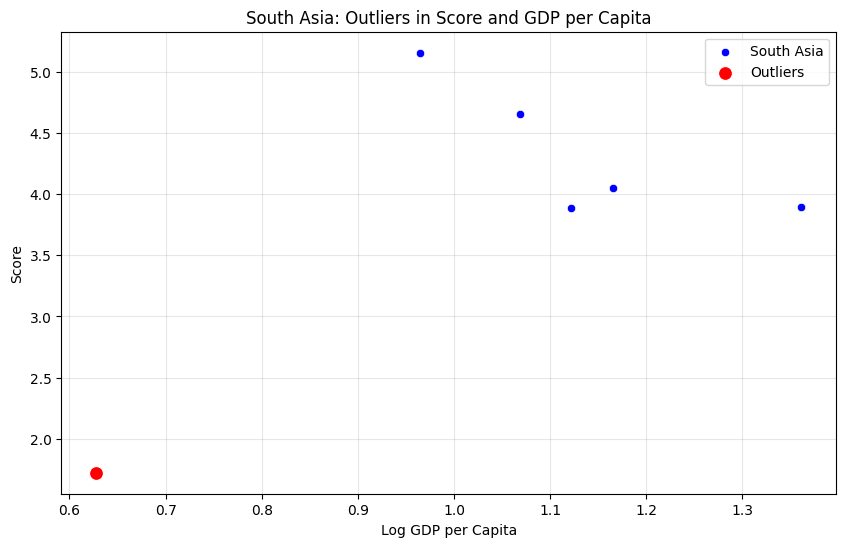

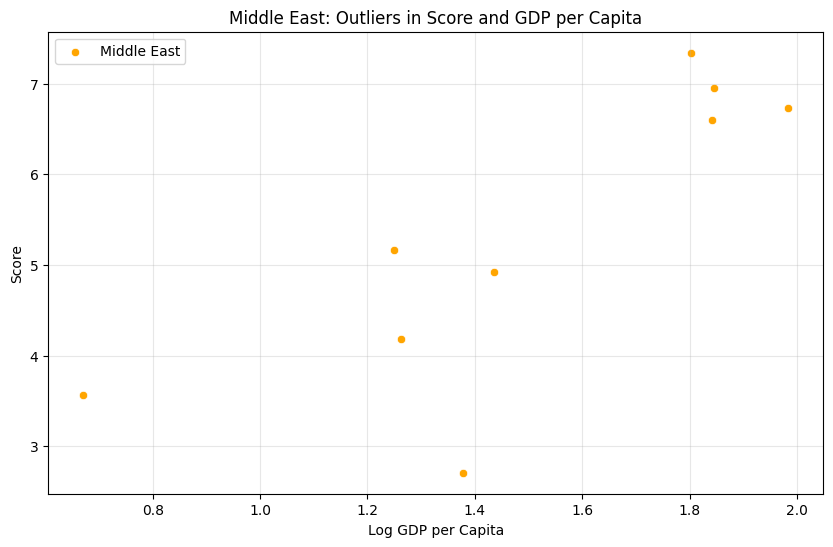

In [47]:
# Scatter plot for South Asia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', label='South Asia', color='blue')
sns.scatterplot(data=south_asia_outliers, x='Log GDP per capita', y='score', label='Outliers', color='red', s=100)
plt.title('South Asia: Outliers in Score and GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Scatter plot for Middle East
plt.figure(figsize=(10, 6))
sns.scatterplot(data=middle_east_df, x='Log GDP per capita', y='score', label='Middle East', color='orange')
sns.scatterplot(data=middle_east_outliers, x='Log GDP per capita', y='score', label='Outliers', color='red', s=100)
plt.title('Middle East: Outliers in Score and GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

<ipython-input-48-ba973b48427b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='score', data=comparison_df, palette='Set2')


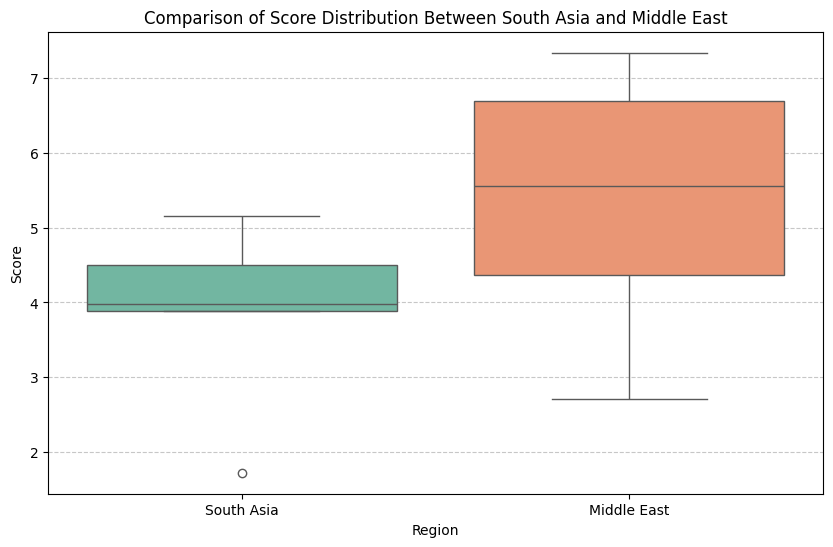

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine data for comparison
comparison_df = pd.concat([
    south_asia_df[['Country name', 'score']].assign(Region='South Asia'),
    middle_east_df[['Country name', 'score']].assign(Region='Middle East')
])

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=comparison_df, palette='Set2')

# Add titles and labels
plt.title('Comparison of Score Distribution Between South Asia and Middle East')
plt.ylabel('Score')
plt.xlabel('Region')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
